To explore different orders of magnitude, let’s consider four different solutions to the problem of detecting if a string is an anagram. One string is an anagram of another if the second is a rearrangement of the letters in the first. For example, 'heart' and 'earth' are anagrams.

For the sake of simplicity, let’s assume that the two strings in question use symbols from the set of 26 lowercase alphabetic characters. Our goal is to write a boolean function that will take two strings and return whether they are anagrams.

In [31]:
import functools
import time

In [32]:
def get_time(func):
    @functools.wraps(func)
    def wrapper(*args):
        start = time.time()
        x = func(*args)
        end = time.time()
        return x, end - start
    return wrapper
        

In [35]:
@get_time
def anagram_checking_off(s1,s2):
    if len(s1) != len(s2):
        return False
    
    to_check_off = list(s2)
    
    for char in s1:
        for i, other_char in enumerate(to_check_off):
            if char == other_char:
                to_check_off[i] = None
                break
        else: #if for-loop does not encounter a "break"
            return False
    
    return True

In [36]:
anagram_checking_off(100*'abcd',100*'dcba')

(True, 0.00877690315246582)

In [37]:
anagram_checking_off('abcd','dcbb')

(False, 4.887580871582031e-05)

This is $O(n^2)$.

In [38]:
from itertools import zip_longest

In [39]:
@get_time
def anagram_sort_and_compare(s1, s2):
    for x, y in zip_longest(sorted(s1),sorted(s2)):
        if x != y:
            return False
    return True

This is $O(n log n)$. (Not $O(n^2 log n)$?)

In [40]:
@get_time
def anagram_sort_and_compare2(s1, s2):
    return sorted(s1) == sorted(s2)

I feel like this should have the same computational time as the first one, but in practice, this is a lot faster.

In [41]:
@get_time
def anagram_count_compare(s1, s2):
    c1 = [0] * 26
    c2 = [0] * 26
    
    for char in s1:
        pos = ord(char) - ord('a')
        c1[pos] += 1
    
    for char in s2:
        pos = ord(char) - ord('a')
        c2[pos] += 1
        
    for a,b in zip(c1,c2):
        if a!=b:
            return False
    return True
        

This is $O(n)$.

In [42]:
from collections import Counter

In [43]:
@get_time
def anagram_with_counter(s1, s2):
    return Counter(s1) == Counter(s2)

In [44]:
import matplotlib.pyplot as plt

In [45]:
text = "abcde"

In [64]:
x = [i*1000*text for i in range(50)]
x2 = [len(x_val) for x_val in x]
#y1 = [anagram_checking_off(x_val,x_val)[1] for x_val in x]
#y2 = [anagram_sort_and_compare(x_val,x_val)[1] for x_val in x]
y3 = [anagram_sort_and_compare2(x_val,x_val)[1] for x_val in x]
y4 = [anagram_count_compare(x_val,x_val)[1] for x_val in x]
y5 = [anagram_with_counter(x_val,x_val)[1] for x_val in x]

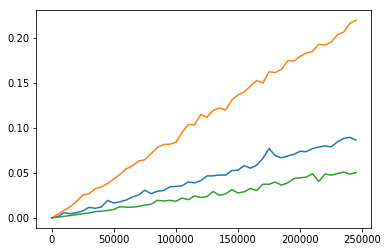

In [65]:
# plt.plot(x2,y1)
#plt.plot(x2,y2)
plt.plot(x2,y3)
plt.plot(x2,y4)
plt.plot(x2,y5)